#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    -> 結果:
       [MSE]  loss: 0.0239 - accuracy: 0.8372 - val_loss: 0.0374 - val_accuracy: 0.7298
       [binary _crossentropy]  loss: 0.0640 - accuracy: 0.8731 - val_loss: 0.1229 - val_accuracy: 0.7444

    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))
model.add(Dropout(rate=0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(rate=0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(10, activation='softmax'))

In [8]:
model2 = Sequential()
model2.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))
model2.add(Dropout(rate=0.25))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model2.add(Dropout(0.25))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dropout(rate=0.25))
model2.add(Dense(1024, activation='relu'))
model2.add(Dropout(rate=0.25))
model2.add(Dense(10, activation='softmax'))

In [9]:
#檢查model 的STACK
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [10]:
#檢查model 的STACK
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_4 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

# 載入之前訓練的模型

In [11]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''

'\n作業:\n請分別選用 "MSE", "binary _crossentropy"\n查看Train/test accurancy and loss rate\n'

使用 MSE

In [13]:
model.compile(loss='MSE', optimizer='adam', metrics=['accuracy'])
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)

Epoch 1/12
293/293 [==============================] - 102s 348ms/step - loss: 0.0712 - accuracy: 0.4146 - val_loss: 0.0627 - val_accuracy: 0.5306
Epoch 2/12
293/293 [==============================] - 92s 315ms/step - loss: 0.0568 - accuracy: 0.5645 - val_loss: 0.0555 - val_accuracy: 0.6062
Epoch 3/12
293/293 [==============================] - 91s 310ms/step - loss: 0.0506 - accuracy: 0.6192 - val_loss: 0.0514 - val_accuracy: 0.6458
Epoch 4/12
293/293 [==============================] - 89s 304ms/step - loss: 0.0460 - accuracy: 0.6586 - val_loss: 0.0474 - val_accuracy: 0.6620
Epoch 5/12
293/293 [==============================] - 91s 311ms/step - loss: 0.0423 - accuracy: 0.6909 - val_loss: 0.0445 - val_accuracy: 0.6827
Epoch 6/12
293/293 [==============================] - 97s 330ms/step - loss: 0.0392 - accuracy: 0.7150 - val_loss: 0.0424 - val_accuracy: 0.7047
Epoch 7/12
293/293 [==============================] - 89s 305ms/step - loss: 0.0357 - accuracy: 0.7462 - val_loss: 0.0417 - val_a

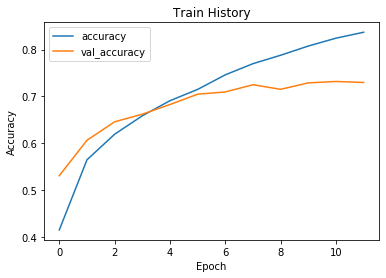

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
    plt.show()

show_train_history('accuracy','val_accuracy')

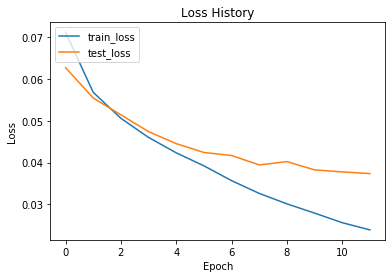

In [15]:
def show_loss_history(train_loss,test_loss):
    plt.plot(train_history.history[train_loss])
    plt.plot(train_history.history[test_loss])
    plt.title('Loss History')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train_loss', 'test_loss'], loc='upper left')
    plt.show()
show_loss_history('loss','val_loss')

使用 binary_cross_entropy


In [16]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history=model2.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)

Epoch 1/12
293/293 [==============================] - 89s 302ms/step - loss: 0.2336 - accuracy: 0.4483 - val_loss: 0.2074 - val_accuracy: 0.5561
Epoch 2/12
293/293 [==============================] - 93s 318ms/step - loss: 0.1867 - accuracy: 0.5810 - val_loss: 0.1838 - val_accuracy: 0.6241
Epoch 3/12
293/293 [==============================] - 95s 324ms/step - loss: 0.1644 - accuracy: 0.6382 - val_loss: 0.1700 - val_accuracy: 0.6530
Epoch 4/12
293/293 [==============================] - 97s 333ms/step - loss: 0.1508 - accuracy: 0.6732 - val_loss: 0.1602 - val_accuracy: 0.6704
Epoch 5/12
293/293 [==============================] - 95s 325ms/step - loss: 0.1370 - accuracy: 0.7070 - val_loss: 0.1513 - val_accuracy: 0.6993
Epoch 6/12
293/293 [==============================] - 99s 336ms/step - loss: 0.1242 - accuracy: 0.7345 - val_loss: 0.1448 - val_accuracy: 0.7046
Epoch 7/12
293/293 [==============================] - 96s 328ms/step - loss: 0.1129 - accuracy: 0.7638 - val_loss: 0.1384 - val_ac

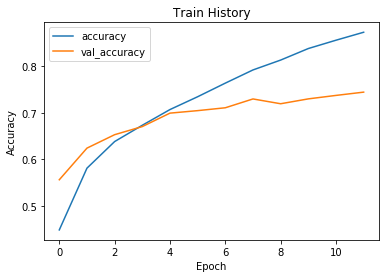

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
    plt.show()

show_train_history('accuracy','val_accuracy')

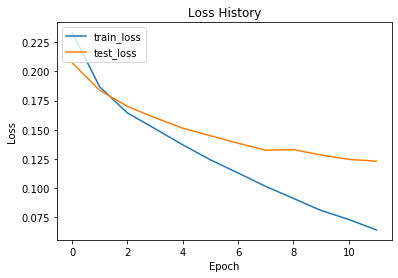

In [18]:
def show_loss_history(train_loss,test_loss):
    plt.plot(train_history.history[train_loss])
    plt.plot(train_history.history[test_loss])
    plt.title('Loss History')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train_loss', 'test_loss'], loc='upper left')
    plt.show()
show_loss_history('loss','val_loss')